In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [4]:
# loading the dataframe 

final_df = pd.read_csv('/teamspace/studios/this_studio/Flight_delay_analysis/data/preprocessed_flight_data_for_binary_classification.csv')
final_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [5]:
final_df.sample(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
2927235,-0.760704,-0.760704,0.005042,1.117740,0.723113,-1.048351,-0.934619,0.481256,0.387332,-1.385247,-1.226631,0.291757,-0.174818,-1.237730,-0.968194,-0.748491,-1.066491,-0.962038,0.139612,False,False,0.401421,0.307679,0.407676,0.307264,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,30,3,5,2019,True
1071088,-1.443203,-1.443203,-0.346633,1.038224,-1.000159,-1.548605,-1.524195,0.922241,1.470366,-0.981854,-0.982308,-0.407115,-0.834893,-1.006129,-0.958714,-0.102438,-0.904238,-0.869919,-0.534100,False,False,-0.618752,-0.723019,-0.622395,-0.493901,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,28,2,6,2021,False
2478124,-1.272579,-1.272579,-1.401658,-0.454018,-0.839908,0.158143,0.244534,-1.508073,-0.306189,1.601095,1.553044,-0.181010,-0.504855,1.527511,-1.931339,-0.586978,-1.905123,-1.915187,-0.613360,False,False,2.357916,2.072572,2.250198,2.921681,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,21,2,3,2019,True
2907495,-1.272579,-1.272579,-1.401658,-0.454018,-1.288039,-0.832556,-0.887072,1.569018,1.460865,-1.278224,-1.254668,-0.242675,0.045207,-1.267679,-1.176749,-0.263951,-1.254157,-1.163195,-0.197244,True,False,-0.548877,0.180606,0.146531,-0.441171,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,1,4,2,2020,False
2251314,0.604293,0.604293,1.411742,1.260868,0.634402,-0.606951,0.605887,-0.126322,1.688872,1.712234,1.655179,-0.242675,3.455593,1.781075,1.653912,0.220588,1.627296,1.649254,0.357577,False,False,-0.814401,-0.398279,-0.883540,-1.016104,-0.138889,-0.051551,1.322167,-0.017174,-0.178016,20,2,0,2023,True
3269911,0.945543,0.945543,1.060067,-1.546032,0.035044,0.373938,0.739017,0.402859,-1.056712,0.841486,0.869174,-0.006745,-0.720022,0.841813,0.825286,-0.586978,0.846396,0.818210,-0.072384,False,False,0.354051,0.313803,0.471361,0.307264,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,5,2,1,2019,True
3440859,-0.419455,-0.419455,-0.522471,1.218459,-1.133671,0.464504,0.285165,-0.838697,-0.846152,1.372315,1.317311,-0.315674,-0.293826,1.296324,1.540318,3.055367,1.580110,1.569613,-0.003538,False,False,-0.241134,-0.026267,-0.261457,-0.127033,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,7,2,3,2019,True
1264816,0.433669,0.433669,0.356717,1.115089,1.736701,0.756485,0.653434,0.883042,0.843346,-1.494327,-0.858143,3.518900,-0.944905,-0.884338,-0.956818,0.059075,-1.525881,-0.866159,3.428910,False,False,-1.024026,-1.005402,-0.912556,-1.016104,5.440651,-0.051551,-0.157574,-0.017174,-0.178016,7,2,3,2019,True
556212,0.945543,0.945543,1.060067,-1.546032,0.293296,0.668205,0.681962,-0.204719,-0.211186,1.045401,1.010326,-0.201565,-0.834893,0.980452,1.689935,-0.263951,-2.884504,-2.757418,-0.355765,False,False,1.086194,0.985398,1.147586,1.416307,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,2,5,2022,False
1285146,0.945543,0.945543,1.060067,-1.546032,-0.036935,1.188076,1.033806,0.138268,0.130825,0.592613,0.571747,-0.181010,-0.834893,0.543205,0.480316,-0.586978,0.477843,0.476147,-0.355765,False,False,-0.870301,-1.005402,-0.869032,-0.789873,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,20,6,3,2019,True


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

In [7]:
final_df.isna().sum()

airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
day                        0
month                      0
day_of_week                0
year                       0
target        

In [8]:
final_df.duplicated().sum()

0

### Feature Importance 

In [9]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [10]:
# splitting the data 
X = final_df.drop(columns='target')  # Features
y = final_df['target']  # Target

In [11]:
# Convert data to DMatrix for XGBoost (optional but faster)
dtrain = xgb.DMatrix(X, label=y)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Get feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert feature importance to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


             Feature  Importance
17         arr_delay       305.0
10         dep_delay       284.0
11          taxi_out       243.0
14           taxi_in       201.0
5        origin_city       151.0
4             origin       125.0
3          fl_number       118.0
6               dest       109.0
7          dest_city       100.0
24               day        86.0
21          air_time        83.0
2           dot_code        78.0
0            airline        74.0
12        wheels_off        67.0
22          distance        62.0
1       airline_code        59.0
25             month        57.0
16          arr_time        54.0
20      elapsed_time        54.0
13         wheels_on        52.0
9           dep_time        51.0
8       crs_dep_time        49.0
19  crs_elapsed_time        49.0
26       day_of_week        44.0
15      crs_arr_time        43.0
27              year        34.0
18         cancelled        15.0
23     delay_due_nas         8.0


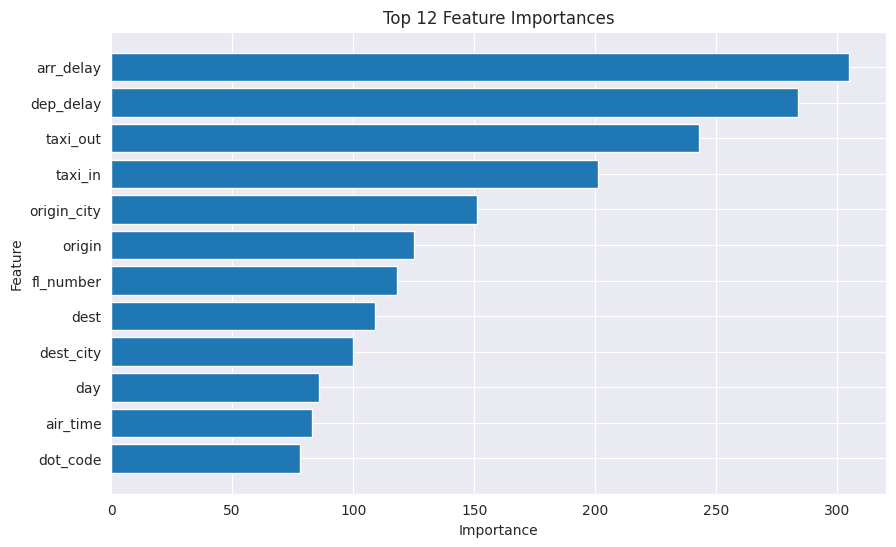

In [12]:
# Plot top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:12], importance_df['Importance'][:12])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 12 Feature Importances')

# Saving the plot
plot_path = '../eda_charts/Top_12_features_for_flight_binary_classification.png'
plt.savefig(plot_path)

plt.show()

In [13]:
# lets drop unnecessary columns

columns_to_drop = [
    'airline_dot', 'airline_code', 'dot_code', 'origin', 'dest', 
    'cancelled', 'crs_elapsed_time', 'elapsed_time', 'air_time', 
    'delay_due_carrier', 'delay_due_weather', 'delay_due_nas', 
    'delay_due_security', 'delay_due_late_aircraft', 'diverted', 'wheels_off', 'wheels_on'
]

final_flight_df = final_df.drop(columns=columns_to_drop)

final_flight_df.head(10)

,airline,fl_number,origin_city,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,distance,day,month,day_of_week,year,target
0,1.286792,-0.543443,-0.554247,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.586978,0.020407,-0.038968,-0.355765,0.434838,9,1,2,2019,False
1,-1.101954,-0.779814,0.415701,1.346862,1.631967,1.569065,-0.324895,-0.834893,4.904470,1.611658,1.583455,-0.177429,1.002968,19,11,5,2022,False
2,1.286792,-1.174718,-0.830017,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.425465,-0.466351,-0.405564,-0.078354,-0.220042,22,7,4,2022,True
3,-1.101954,-0.123929,0.415701,1.204357,0.580264,0.555725,-0.222120,1.145331,0.220588,0.661599,0.724304,0.397207,1.326155,6,3,0,2023,True
4,1.116167,-1.204479,0.739017,-0.885707,1.055691,1.016334,-0.242675,-0.174818,1.028154,1.076028,1.075860,-0.098169,0.298759,23,2,6,2020,False
5,0.945543,-1.056819,-0.896582,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.748491,-0.743940,-0.257045,2.715568,-1.068835,31,7,2,2019,True
6,-1.272579,-0.216073,1.689947,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,0.059075,-0.648152,-0.634921,-0.652990,-0.698020,11,6,6,2023,False
7,0.604293,1.117445,-0.202403,1.688872,0.650240,0.613802,-0.324895,0.595269,5.389010,0.888362,1.015701,0.377392,-0.334009,8,7,0,2019,True
8,1.116167,-1.099744,-0.211912,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,0.059075,-1.512197,-1.432032,-0.296319,0.968948,12,2,6,2023,False
9,-1.613828,-1.309787,1.347612,-0.629199,1.642257,1.573070,-0.386560,0.265232,-0.748491,1.689852,1.669934,-0.058539,1.230900,22,8,5,2020,True


In [14]:
# Split the dataset based on year data: training data from 2019 to 2022 and test data for 2023
train_data = final_flight_df[final_flight_df["year"] < 2023]
test_data = final_flight_df[final_flight_df["year"] == 2023]

# Drop the "year" column from both training and test sets
train_data = train_data.drop(columns=["year"])
test_data = test_data.drop(columns=["year"])

# Split the training and test sets into features (X) and target (y)
X_train = train_data.drop(columns=["target"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]

# Display the shapes of the resulting datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2950544, 16), (2950544,), (525854, 16), (525854,))

#### Model Building 

In [15]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Import metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report
)

### Logistic Regression

In [16]:
# logistic regression
log_reg = LogisticRegression(random_state=142)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])}")

Logistic Regression:
Accuracy: 0.9401716065676025
Precision: 0.9531440797553569
Recall: 0.9372110726643599
F1 Score: 0.9451104299081073
ROC-AUC Score: 0.9867735901605015


In [17]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification report:\n", classification_report(y_test, y_pred_log_reg))

Confusion Matrix:
[[223539  13315]
 [ 18146 270854]]
Classification report:
               precision    recall  f1-score   support

       False       0.92      0.94      0.93    236854
        True       0.95      0.94      0.95    289000

    accuracy                           0.94    525854
   macro avg       0.94      0.94      0.94    525854
weighted avg       0.94      0.94      0.94    525854



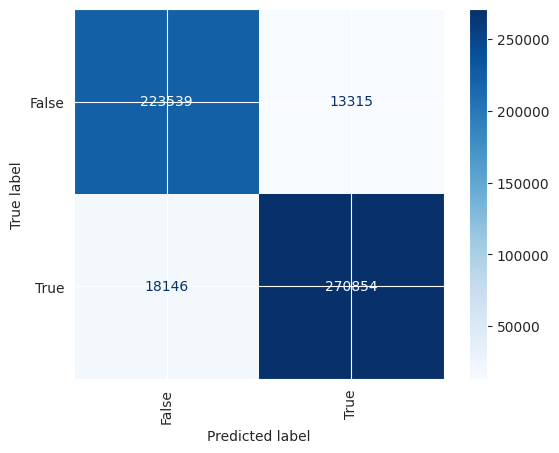

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/logistic_regression_trimmed_data_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [20]:
import joblib
# Save the model to a file
joblib.dump(log_reg, '../models/logistic_regression_trimmed_data_model.joblib')

['../models/logistic_regression_trimmed_data_model.joblib']

### Random Forest

In [21]:
# random forest 
rf = RandomForestClassifier(random_state=142)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [22]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")


Random Forest:
Accuracy: 0.9998916048941341
Precision: 1.0
Recall: 0.9998027681660899
F1 Score: 0.9999013743569868
ROC-AUC Score: 0.9999999997005149


In [23]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[236854      0]
 [    57 288943]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    236854
        True       1.00      1.00      1.00    289000

    accuracy                           1.00    525854
   macro avg       1.00      1.00      1.00    525854
weighted avg       1.00      1.00      1.00    525854



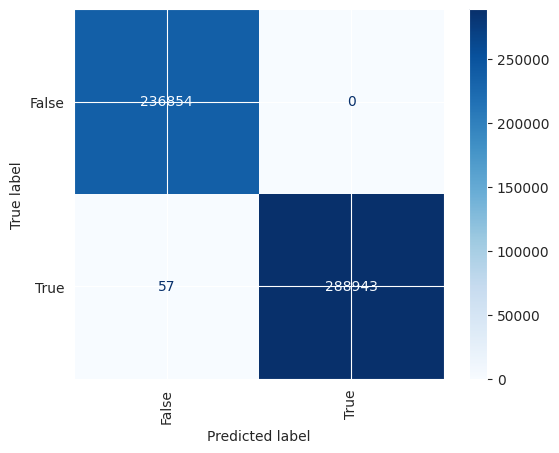

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/random_forest_confusion_trimmed_data_matrix.png'
plt.savefig(plot_path)

plt.show()

In [25]:
# Save the model to a file
joblib.dump(rf, '../models/random_forest_trimmed_data_model.joblib')

['../models/random_forest_trimmed_data_model.joblib']

### XGBoost Classifier

In [27]:
# xg boost 
xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [28]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.9997033397102618
Precision: 1.0
Recall: 0.9994602076124568
F1 Score: 0.9997300309426074
ROC-AUC Score: 0.9999916482502778


In [29]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[236854      0]
 [   156 288844]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    236854
        True       1.00      1.00      1.00    289000

    accuracy                           1.00    525854
   macro avg       1.00      1.00      1.00    525854
weighted avg       1.00      1.00      1.00    525854



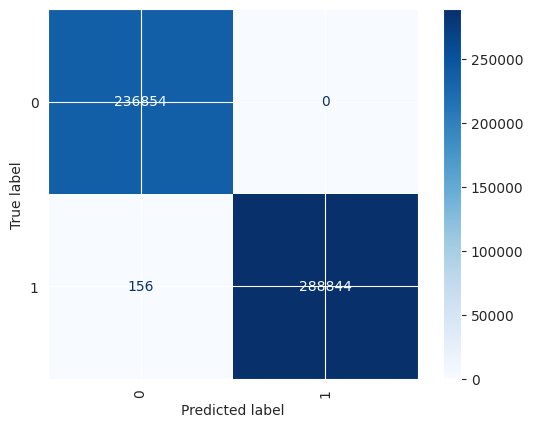

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/xgboost_confusion_trimmed_data_matrix.png'
plt.savefig(plot_path)

plt.show()

In [31]:
# Save the model to a file
joblib.dump(xgb, '../models/xgboost_trimmed_data_model.joblib')

['../models/xgboost_trimmed_data_model.joblib']

In [36]:
final_flight_df.head(2)

,airline,fl_number,origin_city,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,distance,day,month,day_of_week,year,target
0,1.286792,-0.543443,-0.554247,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.586978,0.020407,-0.038968,-0.355765,0.434838,9,1,2,2019,False
1,-1.101954,-0.779814,0.415701,1.346862,1.631967,1.569065,-0.324895,-0.834893,4.904470,1.611658,1.583455,-0.177429,1.002968,19,11,5,2022,False


### Final Evaluation

In [2]:
# final model test 
import pandas as pd
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model
try:
    xgb_model = load('/teamspace/studios/this_studio/Flight_delay_analysis/models/xgboost_trimmed_data_model.joblib')
except FileNotFoundError:
    raise FileNotFoundError("The model file was not found. Please check the path.")

# Define the input data (using the sample data from the DataFrame)
sample_input = {
    'airline': 17,
    'fl_number': 1562,
    'origin_city': '118',
    'dest_city': '240',
    'crs_dep_time': 1155,
    'dep_time': 1151,
    'dep_delay': 0.0,
    'taxi_out': 19.0,
    'taxi_in': 4.0,
    'crs_arr_time': 1501,
    'arr_time': 1447,
    'arr_delay': 0.0,
    'distance': 1065.0,
    'day': 9,
    'month': 1,
    'day_of_week': 2,
}

# Convert the input data to a DataFrame for consistency with model input expectations
input_df = pd.DataFrame([sample_input])

# Encode the categorical columns
def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['category', 'object']).columns

    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

# Encode the input data
encoded_input_df = encode_categorical_columns(input_df)

# Define the mapping from numeric prediction to label
prediction_mapping = {0: 'No delay', 1: 'Delay'}

# Predict the class using the XGBoost model
try:
    numeric_prediction = xgb_model.predict(encoded_input_df)[0]
    label_prediction = prediction_mapping.get(numeric_prediction, "Unknown")
    print(f"Predicted class: {label_prediction}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Predicted class: Delay


In [16]:
import pandas as pd
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model
try:
    xgb_model = load('/teamspace/studios/this_studio/Flight_delay_analysis/models/xgboost_trimmed_data_model.joblib')
except FileNotFoundError:
    raise FileNotFoundError("The model file was not found. Please check the path.")

# Define the input data
data = [
    [1.286792, -0.543443, -0.554247, 0.605839, -0.354125, -0.359484, -0.283785, 0.265232, -0.586978, 0.020407, -0.038968, -0.355765, 0.434838, 9, 1, 2],
    [-1.101954, -0.779814, 0.415701, 1.346862, 1.631967, 1.569065, -0.324895, -0.834893, 4.904470, 1.611658, 1.583455, -0.177429, 1.002968, 19, 11, 5],
    [1.286792, -1.174718, -0.830017, 0.415833, -0.767809, -0.661884, -0.078234, 0.375244, -0.425465, -0.466351, -0.405564, -0.078354, -0.220042, 22, 7, 4],
    [-1.101954, -0.123929, 0.415701, 1.204357, 0.580264, 0.555725, -0.222120, 1.145331, 0.220588, 0.661599, 0.724304, 0.397207, 1.326155, 6, 3, 0],
    [1.116167, -1.204479, 0.739017, -0.885707, 1.055691, 1.016334, -0.242675, -0.174818, 1.028154, 1.076028, 1.075860, -0.098169, 0.298759, 23, 2, 6],
    [0.945543, -1.056819, -0.896582, 0.710342, -0.652554, -0.187257, 2.820028, -0.174818, -0.748491, -0.743940, -0.257045, 2.715568, -1.068835, 31, 7, 2],
    [-1.272579, -0.216073, 1.689947, -1.284719, -0.652554, -0.659881, -0.386560, 0.705282, 0.059075, -0.648152, -0.634921, -0.652990, -0.698020, 11, 6, 6],
    [0.604293, 1.117445, -0.202403, 1.688872, 0.650240, 0.613802, -0.324895, 0.595269, 5.389010, 0.888362, 1.015701, 0.377392, -0.334009, 8, 7, 0],
    [1.116167, -1.099744, -0.211912, 0.244828, -1.640454, -1.609136, -0.263230, -0.614868, 0.059075, -1.512197, -1.432032, -0.296319, 0.968948, 12, 2, 6],
    [-1.613828, -1.309787, 1.347612, -0.629199, 1.642257, 1.573070, -0.386560, 0.265232, -0.748491, 1.689852, 1.669934, -0.058539, 1.230900, 22, 8, 5]
]

columns = ['airline', 'fl_number', 'origin_city', 'dest_city', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'distance', 'day', 'month', 'day_of_week']

# Convert the input data to a DataFrame
input_df = pd.DataFrame(data, columns=columns)

# Encode the categorical columns
def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['category', 'object']).columns

    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

# Encode the input data
encoded_input_df = encode_categorical_columns(input_df)

# Define the mapping from numeric prediction to label
prediction_mapping = {0: 'No delay', 1: 'Delay'}

# Predict the class using the XGBoost model for each row
try:
    numeric_predictions = xgb_model.predict(encoded_input_df)
    label_predictions = [prediction_mapping.get(pred, "Unknown") for pred in numeric_predictions]
    for i, label in enumerate(label_predictions):
        print(f"Row {i} predicted class: {label}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Row 0 predicted class: No delay
Row 1 predicted class: No delay
Row 2 predicted class: Delay
Row 3 predicted class: Delay
Row 4 predicted class: Delay
Row 5 predicted class: Delay
Row 6 predicted class: No delay
Row 7 predicted class: Delay
Row 8 predicted class: No delay
Row 9 predicted class: Delay
